In [1]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt

import SRT_optimization as srt

from matplotlib.backends.backend_pdf import PdfPages


gc.collect()

0

In [2]:
BMBR_path="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/"
BMBR_path_shifts="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data_chemical_shift/"

In [14]:
for root, dirs, files in os.walk(BMBR_path_shifts):
    for dire in dirs:
        if not os.path.isdir(BMBR_path+dire):
            print(dire)
            os.system("rm -r "+BMBR_path_shifts+dire)

In [6]:
os.path.isdir(BMBR_path+"bmr19127")

True

In [ ]:
# load in experimental data
experiments={}
for root, dirs, files in os.walk(BMBR_path):
    if len(files)==1:
        file=root+"/"+files[0]
apu=[]        
if 1==1:
    if 1==1:
        file=BMBR_path+"bmr4267/bmr4267_3.str"
        with open(file,"r") as f:
            read_relaxations=False
            read_shifts=False
            counter_relaxations=0
            counter_shifts=0
            for idline,line in enumerate(f):
                counter_relaxations+=1
                counter_shifts+=1
                if "_Entry.ID" in line:
                    ID=line.split()[1]
                    experiments[ID]={}
                    experiments[ID]["disordered"]=False
                    experiments[ID]["micelle"]=False
                    experiments[ID]["shifts"]={}
                    experiments[ID]["shifts"]["AA_shift"]=[]
                    experiments[ID]["shifts"]["atomID_shift"]=[]
                    shifts=["H","HA","C","CA","CB","N"]
                    for shift in shifts:
                        experiments[ID]["shifts"][shift]=[]
                if "_Heteronucl_T2_list.Spectrometer_frequency_1H" in line:
                    field=line.split()[1]
                    try:
                        if float(field)>1100:
                            field=float(field)/1000000
                    except:
                        print(ID,field)
                        
                    
                    experiments[ID][field]={}
                    experiments[ID][field]["results"]={}
                    experiments[ID][field]["results"]["AA"]=[]
                    experiments[ID][field]["results"]["atomID"]=[]
                    experiments[ID][field]["results"]["R2"]=[]

                if "_Heteronucl_T2_list.T2_val_units" in line:
                    units=line.split()[1]
                    experiments[ID][field]["units"]=units
                if "_T2.Heteronucl_T2_list_ID" in line:
                    counter_relaxations=-3
                if counter_relaxations==-1:
                    read_relaxations=True
                if read_relaxations:
                    if len(line.split())==21:
                        experiments[ID][field]["results"]["AA"].append(line.split()[6])
                        experiments[ID][field]["results"]["atomID"].append(int(line.split()[5]))
                        if experiments[ID][field]["units"]=="s-1" or experiments[ID][field]["units"]=="Hz":
                            try:
                                experiments[ID][field]["results"]["R2"].append(float(line.split()[10]))
                            except:
                                experiments[ID][field]["results"]["R2"].append("Nan")
                        elif experiments[ID][field]["units"]=="s":
                            try:
                                experiments[ID][field]["results"]["R2"].append(1/float(line.split()[10]))
                            except:
                                experiments[ID][field]["results"]["R2"].append("Nan")
                        elif experiments[ID][field]["units"]=="ms":
                            try:
                                experiments[ID][field]["results"]["R2"].append(1/float(line.split()[10])*1000)
                            except:
                                experiments[ID][field]["results"]["R2"].append("Nan")
                        elif experiments[ID][field]["units"]=="ms-1":
                            try:
                                experiments[ID][field]["results"]["R2"].append(float(line.split()[10])/1000)
                            except:
                                experiments[ID][field]["results"]["R2"].append("Nan")

                    else:
                        read_relaxations=False
                if "_Atom_chem_shift.Assigned_chem_shift_list_ID" in line:
                    counter_shifts=-3
                if counter_shifts==-1:
                    read_shifts=True
                if read_shifts:
                    
                    if len(line.split())==24:
                        if len(experiments[ID]["shifts"]["atomID_shift"])>0:
                            if line.split()[5]==experiments[ID]["shifts"]["atomID_shift"][-1]:
                                for index,shift in enumerate(shifts):
                                    if shift==line.split()[7]:
                                        experiments[ID]["shifts"][shift].append(line.split()[10])
                            else:
                                apu.append(len(experiments["4267"]["shifts"]["CB"]))
                                print("New line starts here:",len(experiments["4267"]["shifts"]["CB"]))
                                experiments[ID]["shifts"]["atomID_shift"].append(line.split()[5])
                                experiments[ID]["shifts"]["AA_shift"].append(line.split()[6])
                                for index,shift in enumerate(shifts):
                                    if len(experiments[ID]["shifts"][shift])<len(experiments[ID]["shifts"]["atomID_shift"])-1:
                                        experiments[ID]["shifts"][shifts[index]].append("Nan")
                                   
                                    if shifts[index]==line.split()[7]:
                                        experiments[ID]["shifts"][shifts[index]].append(line.split()[10])
                                    
                            #if len(experiments["4267"]["shifts"]["CB"])>=11:
                            #    print(idline,line.split()[5],line.split()[7],experiments["4267"]["shifts"]["CB"])
                            #    print(len(experiments[ID]["shifts"]["atomID_shift"]))
                                
                        else:
                            experiments[ID]["shifts"]["atomID_shift"].append(line.split()[5])
                            experiments[ID]["shifts"]["AA_shift"].append(line.split()[6])
                            for index,shif in enumerate(shiftsP):
                                if not shif:
                                    experiments[ID]["shifts"][shifts[index]].append("Nan")
                                shiftsP[index]=False
                            
                        
                
                    
                if ("disorder" in line or "Disorder" in line):
                    experiments[ID]["disordered"]=True

                if ("micelle" in line or "Micelle" in line):
                    experiments[ID]["micelle"]=True
                if "_Assembly.Molecular_mass" in line:
                    
                    if line.split()[1]!=".":
                        experiments[ID]["weight"]=float(line.split()[1])
                    else:
                        experiments[ID]["weight"]=None

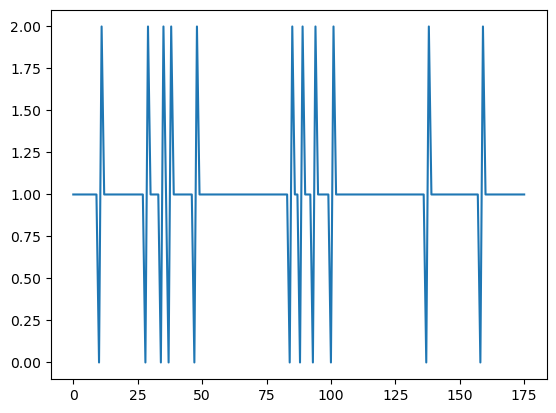

In [22]:
#noin residuella 30 on todennakoisesti jotain vika
# ehka siella ei ole perassa 2 residuea ja se jostain syysta aiheuttaa ongelmia
plt.plot(list(range(len(kk))),kk)

In [21]:
list(range(0,kk)),

TypeError: 'list' object cannot be interpreted as an integer

In [17]:
kk=[]
for i in range(len(apu)-1):
    kk.append(apu[i+1]-apu[i])

In [5]:
print(len(experiments["4267"]["shifts"]["AA_shift"]))
print(len(experiments["4267"]["shifts"]["atomID_shift"]))
print(len(experiments["4267"]["shifts"]["H"]))
print(len(experiments["4267"]["shifts"]["HA"]))
print(len(experiments["4267"]["shifts"]["CA"]))
print(len(experiments["4267"]["shifts"]["C"]))
print(len(experiments["4267"]["shifts"]["CB"]))
print(len(experiments["4267"]["shifts"]["N"]))

178
178
178
177
178
178
177
178


In [14]:
experiments={}
for root, dirs, files in os.walk(BMBR_path):
    if len(files)==1:
        file=root+"/"+files[0]
        
if 1==1:
    if 1==1:
        file="load_data_does_not_work.test"
        with open(file,"r") as f:
            read_relaxations=False
            read_shifts=False
            counter_relaxations=0
            counter_shifts=0
            HN=False
            Ha=False
            C=False
            Ca=False
            Cb=False
            N=False

            experiments["shifts"]={}
            experiments["shifts"]["AA_shift"]=[]
            experiments["shifts"]["atomID_shift"]=[]
            shifts=["H","HA","C","CA","CB","N"]
            for shift in shifts:
                experiments["shifts"][shift]=[]
            
            for idline,line in enumerate(f):
                counter_relaxations+=1
                counter_shifts+=1


                
                if "_Atom_chem_shift.Assigned_chem_shift_list_ID" in line:
                    counter_shifts=-3
                if counter_shifts==-1:
                    read_shifts=True
                if read_shifts:
                    shiftsP=[HN,Ha,C,Ca,Cb,N]
                    if len(line.split())==24:
                        if len(experiments["shifts"]["atomID_shift"])>0:
                            if line.split()[5]==experiments["shifts"]["atomID_shift"][-1]:
                                for index,shift in enumerate(shifts):
                                    if shift==line.split()[7]:
                                        experiments["shifts"][shift].append(line.split()[10])
                                        shiftsP[index]=True
                                        if shift=="HA":
                                            print(line.split()[5])
                                #print(line.split()[5], shiftsP)
                            else:
                                print("New line starts here:",shiftsP)
                                experiments["shifts"]["atomID_shift"].append(line.split()[5])
                                experiments["shifts"]["AA_shift"].append(line.split()[6])
                                for index,shift in enumerate(shifts):
                                    if len(experiments["shifts"][shift])<len(experiments["shifts"]["atomID_shift"])-1:
                                        experiments["shifts"][shifts[index]].append("Nan")
                                   
                                    if shift==line.split()[7]:
                                        experiments["shifts"][shift].append(line.split()[10])
                                        shiftsP[index]=True
                                    
                                    shiftsP[index]=False
                            print(idline,line.split()[5],line.split()[7],experiments["shifts"]["H"])
                                
                        else:
                            experiments["shifts"]["atomID_shift"].append(line.split()[5])
                            experiments["shifts"]["AA_shift"].append(line.split()[6])
                            for index,shif in enumerate(shiftsP):
                                if not shif:
                                    experiments["shifts"][shifts[index]].append("Nan")
                                shiftsP[index]=False
                            
                        
                
               

3 1 HE2 ['Nan']
4 1 HE3 ['Nan']
5 1 CE ['Nan']
New line starts here: [False, False, False, False, False, False]
6 2 HA ['Nan']
7 2 HB2 ['Nan']
8 2 HB3 ['Nan']
9 2 HG2 ['Nan']
10 2 HG3 ['Nan']
11 2 C ['Nan']
12 2 CA ['Nan']
13 2 CB ['Nan']
New line starts here: [False, False, False, False, False, False]
14 3 H ['Nan', 'Nan', '8.58']
3
15 3 HA ['Nan', 'Nan', '8.58']
16 3 HB2 ['Nan', 'Nan', '8.58']
17 3 HB3 ['Nan', 'Nan', '8.58']
18 3 C ['Nan', 'Nan', '8.58']
19 3 CA ['Nan', 'Nan', '8.58']
20 3 CB ['Nan', 'Nan', '8.58']
21 3 N ['Nan', 'Nan', '8.58']
New line starts here: [False, False, False, False, False, False]
22 4 H ['Nan', 'Nan', '8.58', '8.51']
4
23 4 HA ['Nan', 'Nan', '8.58', '8.51']
24 4 HB2 ['Nan', 'Nan', '8.58', '8.51']
25 4 HB3 ['Nan', 'Nan', '8.58', '8.51']
26 4 C ['Nan', 'Nan', '8.58', '8.51']
27 4 CA ['Nan', 'Nan', '8.58', '8.51']
28 4 CB ['Nan', 'Nan', '8.58', '8.51']
29 4 N ['Nan', 'Nan', '8.58', '8.51']
New line starts here: [False, False, False, False, False, False]
30 5

In [15]:
print(len(experiments["shifts"]["AA_shift"]))
print(len(experiments["shifts"]["atomID_shift"]))
print(len(experiments["shifts"]["H"]))
print(len(experiments["shifts"]["HA"]))
print(len(experiments["shifts"]["CA"]))
print(len(experiments["shifts"]["C"]))
print(len(experiments["shifts"]["CB"]))
print(len(experiments["shifts"]["N"]))

5
5
5
5
5
5
5
5
